In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [11]:
# Writing the 9-qubit Shor code circuit
# The Shor code encodes one logical qubit into nine physical qubits.

qc = QuantumCircuit(9,1)

qc.h(0) # Initialize logical qubit in |+>

qc.cx(0,3)
qc.cx(0,6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

In [12]:
qc.barrier()
# Insert some error
qc.x(1)
qc.x(3)
qc.z(7)
qc.z(1)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(<Qubit register=(9, "q"), index=0>, <Qubit register=(9, "q"), index=1>, <Qubit register=(9, "q"), index=2>, <Qubit register=(9, "q"), index=3>, <Qubit register=(9, "q"), index=4>, <Qubit register=(9, "q"), index=5>, <Qubit register=(9, "q"), index=6>, <Qubit register=(9, "q"), index=7>, <Qubit register=(9, "q"), index=8>), clbits=())

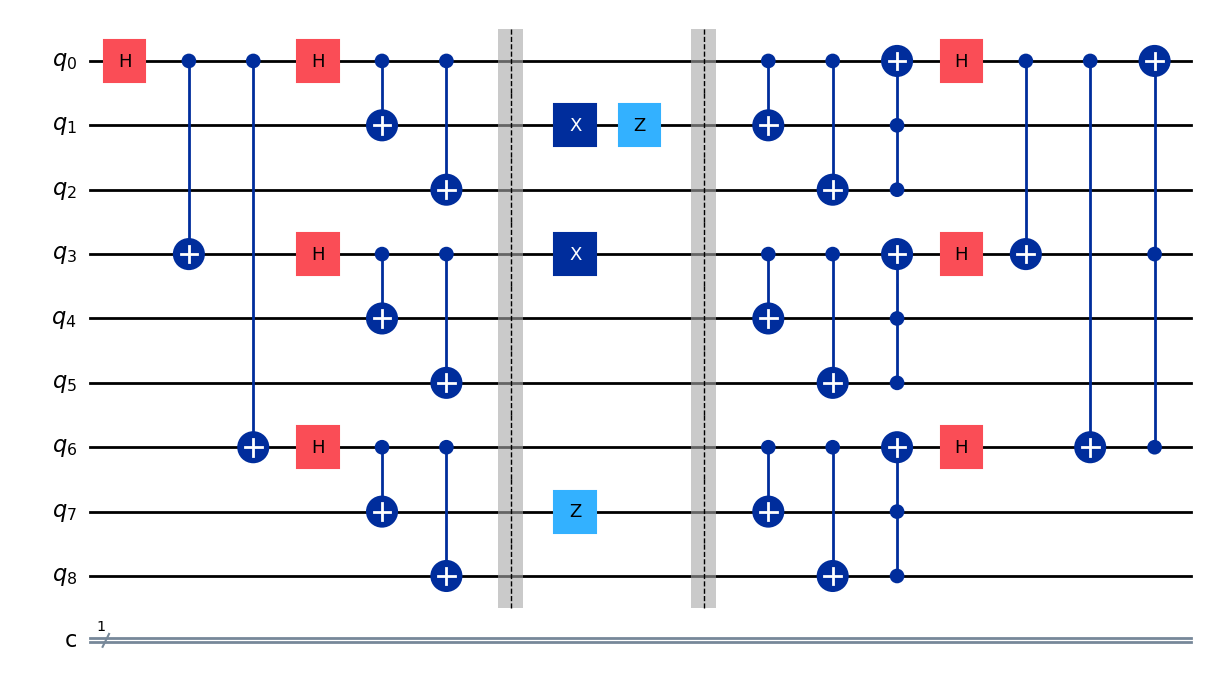

In [13]:
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.ccx(1,2,0)
qc.ccx(4,5,3)
qc.ccx(7,8,6)

qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,3)
qc.cx(0,6)

qc.ccx(3, 6, 0)

qc.draw('mpl')

{'0': 517, '1': 483}


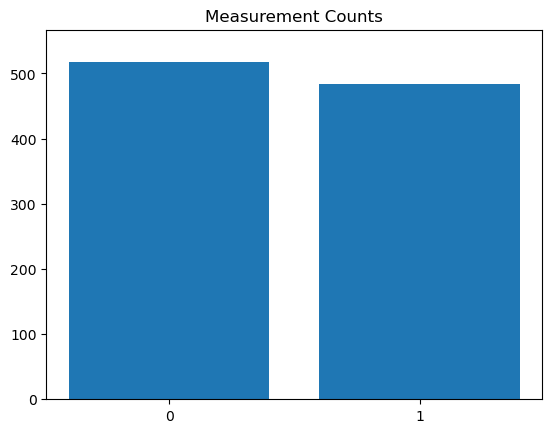

In [19]:
qc.measure(0, 0)

backend = AerSimulator()
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc, shots = 1000).result()
counts = result.get_counts()
print(counts)

labels = list(counts.keys())
values = list(counts.values())

plt.bar(labels, values)

plt.title('Measurement Counts')
plt.ylim(0, max(values) + 50)
plt.show()